In [1]:
import numpy as np                   # array, vector, matrix calculations
import pandas as pd                  # DataFrame handling
import xgboost as xgb                # gradient boosting machines (GBMs)

import matplotlib.pyplot as plt      # plotting
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from termcolor import colored
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,precision_recall_curve,roc_curve,auc
pd.options.display.max_columns = 999 # enable display of all columns in notebook
import seaborn as sns

np.random.seed(12345)

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


## Import data

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.columns = data.columns.str.strip()
data.head() #preview data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
data.drop(['url'],axis = 1,inplace= True)

In [6]:
data.describe() #preview data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

## Define Monotomic Constraints

In [7]:
y = 'shares'
X = [name for name in data.columns if name not in [y, 'ID']]
X

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

In [8]:
pd.DataFrame(data[X + [y]].corr()[y]).iloc[:-1] 

,shares
timedelta,0.008662
n_tokens_title,0.008783
n_tokens_content,0.002459
n_unique_tokens,0.000806
n_non_stop_words,0.000443
n_non_stop_unique_tokens,0.000114
num_hrefs,0.045404
num_self_hrefs,-0.001900
num_imgs,0.039388
num_videos,0.023936


In [9]:
mono_constraints = tuple([int(i) for i in np.sign(data[X + [y]].corr()[y].values[:-1])])
mono_constraints

(1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1)

## Prepare Data For The Model

In [10]:
upper_cut_off = data['shares'].quantile(.75)  #calculate the median of shares, which will be used as the cut off value later
lower_cut_off = data['shares'].quantile(.25)

data['popularity'] = data['shares'].apply(lambda x: 1 
                                           if x >= upper_cut_off else 0 if x <= lower_cut_off else 3) #1 indicates this post is polular while 0 indicates this post is not popular

In [11]:
np.random.seed(666) # set random seed for reproducibility
split_ratio = 0.8     # 80%/20% train/test split

# execute split
split = np.random.rand(len(data)) < split_ratio
train = data[split]
test = data[~split]

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Test data rows = %d, columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 31684, columns = 61
Test data rows = 7960, columns = 61


In [12]:
train = train[train.popularity != 3]

In [13]:
train.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
count,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000,15895.000000
mean,358.165650,10.412457,540.133627,0.576079,1.033029,0.713864,11.070462,3.219880,4.707833,1.341302,4.535293,7.246996,0.049638,0.194212,0.147468,0.051651,0.161434,0.216861,24.845675,1193.471375,315.922647,13077.612708,753740.629129,261875.069550,1122.631113,5937.602805,3214.029004,4348.558852,10875.947227,6878.745717,0.174143,0.192765,0.196791,0.184649,0.137150,0.052721,0.061780,0.114501,0.176674,0.148907,0.216070,0.244900,0.213386,0.444055,0.117139,0.039438,0.016860,0.676182,0.291229,0.354634,0.096572,0.756908,-0.263295,-0.527790,-0.108252,0.291354,0.070952,0.340699,0.160917,5250.111041,0.499151
std,212.173443,2.109348,474.820581,5.557732,8.259125,5.152764,12.019067,3.808758,8.651289,4.307393,0.876144,1.896403,0.217203,0.395605,0.354583,0.221329,0.367943,0.412120,67.973721,4694.852083,739.784825,53264.779030,214823.360971,134990.632902,1158.014403,7287.760069,1481.795521,20286.563742,42268.612954,25097.154180,0.379244,0.394483,0.397586,0.388025,0.344017,0.223483,0.240764,0.318429,0.258053,0.226999,0.283346,0.306200,0.276685,0.119577,0.097885,0.017550,0.010957,0.193251,0.157480,0.107470,0.072546,0.251135,0.131097,0.291926,0.098586,0.328867,0.272865,0.188655,0.231504,17362.522238,0.500015
min,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.380208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,168.000000,9.000000,240.000000,0.471927,1.000000,0.625855,4.000000,1.000000,1.000000,0.000000,4.476361,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,138.800000,0.000000,843300.000000,176082.638889,0.000000,3570.174014,2381.505812,612.000000,1000.000000,935.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [14]:
test.drop(['popularity'],axis = 1,inplace= True) #excluding url column
median_ = data['shares'].quantile(.5)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
test['popularity'] = np.where(test['shares'] > median_, 1,0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
test.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
count,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000
mean,354.585804,10.426256,541.858417,0.530399,0.968467,0.672284,10.772990,3.288945,4.459171,1.238442,4.540579,7.194347,0.054774,0.179648,0.156533,0.061558,0.183668,0.210176,26.099874,1116.650980,310.310917,14672.302136,753065.979899,259431.082896,1107.171415,5527.131311,3113.039377,3744.872813,9712.411432,5929.710942,0.168844,0.186683,0.178643,0.184799,0.142462,0.068342,0.070226,0.138568,0.185990,0.142650,0.215696,0.223059,0.232604,0.442952,0.119299,0.039576,0.016633,0.681113,0.287354,0.352350,0.094676,0.753584,-0.258304,-0.520324,-0.107108,0.276141,0.070377,0.343401,0.154285,3342.524121,0.504397
std,214.351342,2.146088,476.406902,0.138831,0.174763,0.156986,11.138929,4.169807,8.208374,4.051612,0.865606,1.932273,0.227553,0.383918,0.363382,0.240366,0.387238,0.407459,69.656540,3019.783514,604.346550,64404.754975,212526.229604,136855.621096,1140.043184,5024.706935,1260.625288,16969.486488,38149.162660,20660.237470,0.374638,0.389682,0.383077,0.388159,0.349546,0.252347,0.255544,0.345517,0.263688,0.222018,0.280592,0.294983,0.289367,0.117735,0.097653,0.017558,0.011135,0.192771,0.157299,0.103525,0.067736,0.248951,0.127440,0.292897,0.094180,0.321246,0.264338,0.188092,0.225879,7569.042409,0.500012
min,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018182,0.018182,0.018183,0.018213,0.000000,-0.352358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,36.000000,0.000000
25%,165.000000,9.000000,244.000000,0.471400,1.000000,0.626900,4.000000,1.000000,1.000000,0.000000,4.477654,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,140.745556,0.000000,843300.000000,170375.396826,0.000000,3563.998087,2380.926957,638.000000,1100.000000,989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025069,0.025012,0.028572,0.028571,0.028574,0.396

In [17]:
y = 'popularity'
dtrain = xgb.DMatrix(train[X], train[y])
dtest = xgb.DMatrix(test[X], test[y])

In [18]:
# used to calibrate predictions to mean of y 
base_y = train[y].mean()

# tuning parameters
params = {
    'objective': 'binary:logistic',             
    'booster': 'gbtree',                        
    'eval_metric': 'auc',                       
    'eta': 0.08,                                
    'subsample': 0.9,                           
    'colsample_bytree': 0.9,                    
    'max_depth': 15,                            
    'monotone_constraints':mono_constraints,    
    'base_score': base_y,                       
    'seed': 666                               
}

# watchlist is used for early stopping
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# train model
xgb_model = xgb.train(params,                   # set tuning parameters from above                   
                      dtrain,                   # training data
                      1000,                     # maximum of 1000 iterations (trees)
                      evals=watchlist,          # use watchlist for early stopping 
                      early_stopping_rounds=50, # stop after 50 iterations (trees) without increase in AUC
                      verbose_eval=True)  

[0]	train-auc:0.747896	eval-auc:0.657946
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.753567	eval-auc:0.663468
[2]	train-auc:0.762464	eval-auc:0.674112
[3]	train-auc:0.76398	eval-auc:0.674855
[4]	train-auc:0.764857	eval-auc:0.674982
[5]	train-auc:0.765929	eval-auc:0.675715
[6]	train-auc:0.768013	eval-auc:0.67636
[7]	train-auc:0.77258	eval-auc:0.680836
[8]	train-auc:0.776033	eval-auc:0.684962
[9]	train-auc:0.779162	eval-auc:0.687122
[10]	train-auc:0.781777	eval-auc:0.690247
[11]	train-auc:0.783475	eval-auc:0.691802
[12]	train-auc:0.787687	eval-auc:0.694857
[13]	train-auc:0.788902	eval-auc:0.695732
[14]	train-auc:0.791193	eval-auc:0.697981
[15]	train-auc:0.79324	eval-auc:0.699718
[16]	train-auc:0.796343	eval-auc:0.701999
[17]	train-auc:0.797146	eval-auc:0.703135
[18]	train-auc:0.798855	eval-auc:0.704916
[19]	train-auc:0.801091	eval-auc:0.706784
[20]	train-auc:0.802046	eval-auc:

[191]	train-auc:0.858613	eval-auc:0.729618
[192]	train-auc:0.858712	eval-auc:0.729694
[193]	train-auc:0.858789	eval-auc:0.729629
[194]	train-auc:0.858936	eval-auc:0.729552
[195]	train-auc:0.859036	eval-auc:0.729529
[196]	train-auc:0.859132	eval-auc:0.729525
[197]	train-auc:0.859192	eval-auc:0.72949
Stopping. Best iteration:
[147]	train-auc:0.852776	eval-auc:0.729982



## Shapley Values and Plot

In [19]:
shap_values = xgb_model.predict(dtest, pred_contribs=True, ntree_limit=xgb_model.best_ntree_limit)
shap_values

array([[ 0.9412513 , -0.01954774, -0.0646761 , ...,  0.03529772,
        -0.00966422,  0.00671888],
       [ 0.60808617,  0.02368614,  0.20382845, ..., -0.1077367 ,
        -0.00441069,  0.00671888],
       [ 0.7364361 ,  0.03180471, -0.03871206, ..., -0.00669038,
         0.02162311,  0.00671888],
       ...,
       [-0.44454607,  0.00169975, -0.03739794, ..., -0.09127624,
         0.00382147,  0.00671888],
       [-0.47826797,  0.03158583,  0.0255788 , ...,  0.02616876,
         0.04912442,  0.00671888],
       [-0.33877325, -0.00102306, -0.06530663, ...,  0.02581361,
        -0.01161319,  0.00671888]], dtype=float32)

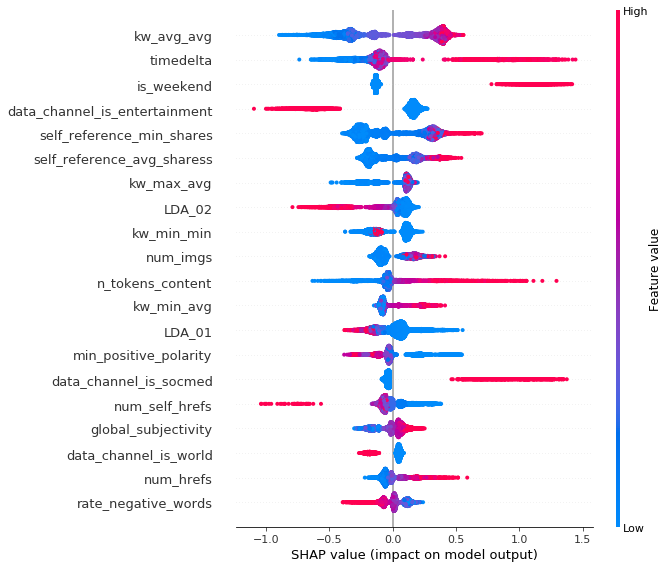

In [20]:
shap.summary_plot(shap_values[:, :-1], test[xgb_model.feature_names])

In [21]:
explainer = shap.TreeExplainer(xgb_model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


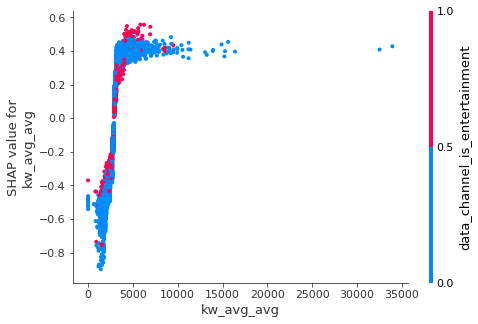

In [24]:
shap.dependence_plot("kw_avg_avg", shap_values[:, :-1], test[xgb_model.feature_names],show=False)

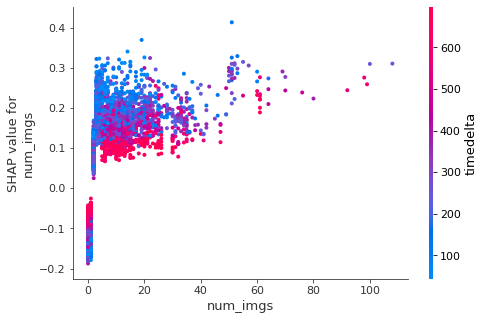

In [26]:
shap.dependence_plot("num_imgs", shap_values[:, :-1], test[xgb_model.feature_names],show=False)

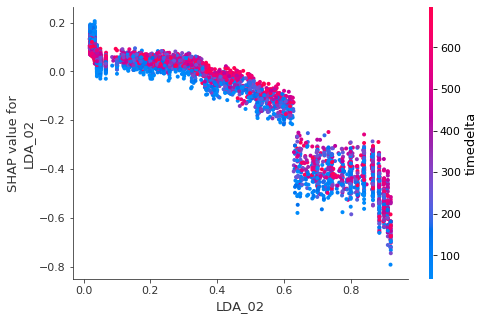

In [29]:
shap.dependence_plot("LDA_02", shap_values[:, :-1], test[xgb_model.feature_names],show=False)

## Train Performance

In [69]:
y_pred_train = xgb_model.predict(dtrain)

In [70]:
train['prediction'] = y_pred_train

In [71]:
train['prediction'] = np.where(train['prediction'] > 0.5, 1,0)

In [72]:
cm = confusion_matrix(train[y], (y_pred_train>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[6157 1804]
 [1863 6071]]
The Accuracy on Test Set is:  0.7692985215476565


In [74]:
f1_score(train[y], train['prediction'], average='weighted')

0.7692938882255881

## Confusion Matrix and Accuracy of Our Model

In [75]:
y_pred = xgb_model.predict(dtest)

In [76]:
test['prediction'] = y_pred

In [77]:
test['prediction'] = np.where(test['prediction'] > 0.5, 1,0)

In [78]:
cm = confusion_matrix(test[y], (y_pred>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[2614 1331]
 [1363 2652]]
The Accuracy on Test Set is:  0.6615577889447236


In [58]:
from sklearn.metrics import f1_score
f1_score(test[y], test['prediction'], average='weighted')

0.661564284284297

In [30]:
test.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
count,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000,7960.000000
mean,10.426256,541.858417,0.530399,0.968467,0.672284,10.772990,3.288945,4.459171,1.238442,4.540579,7.194347,0.054774,0.179648,0.156533,0.061558,0.183668,0.210176,26.099874,1116.650980,310.310917,14672.302136,753065.979899,259431.082896,1107.171415,5527.131311,3113.039377,3744.872813,9712.411432,5929.710942,0.168844,0.186683,0.178643,0.184799,0.142462,0.068342,0.070226,0.138568,0.185990,0.142650,0.215696,0.223059,0.232604,0.442952,0.119299,0.039576,0.016633,0.681113,0.287354,0.352350,0.094676,0.753584,-0.258304,-0.520324,-0.107108,0.276141,0.070377,0.343401,0.154285,3342.524121,0.504397
std,2.146088,476.406902,0.138831,0.174763,0.156986,11.138929,4.169807,8.208374,4.051612,0.865606,1.932273,0.227553,0.383918,0.363382,0.240366,0.387238,0.407459,69.656540,3019.783514,604.346550,64404.754975,212526.229604,136855.621096,1140.043184,5024.706935,1260.625289,16969.486488,38149.162660,20660.237470,0.374638,0.389682,0.383077,0.388159,0.349546,0.252347,0.255544,0.345517,0.263688,0.222018,0.280592,0.294983,0.289367,0.117735,0.097653,0.017558,0.011135,0.192771,0.157299,0.103525,0.067736,0.248951,0.127440,0.292897,0.094180,0.321246,0.264338,0.188092,0.225879,7569.042409,0.500012
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018182,0.018182,0.018183,0.018213,0.000000,-0.352358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,36.000000,0.000000
25%,9.000000,244.000000,0.471400,1.000000,0.626900,4.000000,1.000000,1.000000,0.000000,4.477654,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,140.745556,0.000000,843300.000000,170375.396825,0.000000,3563.998087,2380.926957,638.000000,1100.000000,989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025069,0.025012,0.028572,0.028571,0.028574,0.396174,0.057632,0.028340,0.009553,0.600000,0.184211,0.306596,0.0500

## Partial dependence

License
Copyright 2020 Patrick Hall (jphall@gwu.edu)

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [31]:
def par_dep(xs, frame, model, resolution=20, bins=None):
    
    """ Creates Pandas DataFrame containing partial dependence for a 
        single variable.
    
    Args:
        xs: Variable for which to calculate partial dependence.
        frame: Pandas DataFrame for which to calculate partial dependence.
        model: XGBoost model for which to calculate partial dependence.
        resolution: The number of points across the domain of xs for which 
                    to calculate partial dependence, default 20.
        bins: List of values at which to set xs, default 20 equally-spaced 
              points between column minimum and maximum.
    
    Returns:
        Pandas DataFrame containing partial dependence values.
        
    """
    
    # turn off pesky Pandas copy warning
    pd.options.mode.chained_assignment = None
    
    # initialize empty Pandas DataFrame with correct column names
    par_dep_frame = pd.DataFrame(columns=[xs, 'partial_dependence'])
    
    # cache original column values 
    col_cache = frame.loc[:, xs].copy(deep=True)
  
    # determine values at which to calculate partial dependence
    if bins == None:
        min_ = frame[xs].min()
        max_ = frame[xs].max()
        by = (max_ - min_)/resolution
        bins = np.arange(min_, max_, by)
        
    # calculate partial dependence  
    # by setting column of interest to constant 
    # and scoring the altered data and taking the mean of the predictions
    for j in bins:
        frame.loc[:, xs] = j
        dframe = xgb.DMatrix(frame)
        par_dep_i = pd.DataFrame(model.predict(dframe, ntree_limit=model.best_ntree_limit))
        par_dep_j = par_dep_i.mean()[0]
        par_dep_frame = par_dep_frame.append({xs:j,
                                              'partial_dependence': par_dep_j}, 
                                              ignore_index=True)
        
    # return input frame to original cached state    
    frame.loc[:, xs] = col_cache

    return par_dep_frame

In [50]:
par_dep_num_imgs = par_dep('num_imgs', test[X], xgb_model)         # calculate partial dependence for kw_avg_avg
par_dep_LDA_02 = par_dep('LDA_02', test[X], xgb_model) # calculate partial dependence for kw_max_avg
par_dep_n_tokens_content = par_dep('n_tokens_content', test[X], xgb_model) # calculate partial dependence for par_dep_timedelta

# display partial dependence
par_dep_LDA_02

,LDA_02,partial_dependence
0,0.018182,0.529679
1,0.063273,0.519561
2,0.108364,0.519558
3,0.153454,0.518654
4,0.198545,0.518127
5,0.243636,0.515571
6,0.288727,0.515257
7,0.333818,0.512591
8,0.378909,0.501668
9,0.424000,0.500262


In [35]:
## Helper function for finding percentiles of predictions
def get_percentile_dict(yhat, id_, frame):

    """ Returns the percentiles of a column, yhat, as the indices based on 
        another column id_.
    
    Args:
        yhat: Column in which to find percentiles.
        id_: Id column that stores indices for percentiles of yhat.
        frame: Pandas DataFrame containing yhat and id_. 
    
    Returns:
        Dictionary of percentile values and index column values.
    
    """
    
    # create a copy of frame and sort it by yhat
    sort_df = frame.copy(deep=True)
    sort_df.sort_values(yhat, inplace=True)
    sort_df.reset_index(inplace=True)
    
    # find top and bottom percentiles
    percentiles_dict = {}
    percentiles_dict[0] = sort_df.loc[0, id_]
    percentiles_dict[99] = sort_df.loc[sort_df.shape[0]-1, id_]

    # find 10th-90th percentiles
    inc = sort_df.shape[0]//10
    for i in range(1, 10):
        percentiles_dict[i * 10] = sort_df.loc[i * inc,  id_]

    return percentiles_dict

In [36]:
test['ID'] = range(1, len(test) + 1)

In [37]:
# merge GBM predictions onto test data
yhat_test = pd.concat([test.reset_index(drop=True), pd.DataFrame(xgb_model.predict(dtest, 
                                                                                   ntree_limit=xgb_model.best_ntree_limit))],
                      axis=1)
yhat_test = yhat_test.rename(columns={0:'p_popularity'})

# find percentiles of predictions
percentile_dict = get_percentile_dict('p_popularity', 'ID', yhat_test)

# display percentiles dictionary
# ID values for rows
# from lowest prediction 
# to highest prediction
percentile_dict

{0: 6085,
 99: 6916,
 10: 5210,
 20: 3673,
 30: 1916,
 40: 126,
 50: 4549,
 60: 3410,
 70: 5152,
 80: 4555,
 90: 3901}

## Calculate ICE values

In [51]:
# retreive bins from original partial dependence calculation
#kw_avg_avg, is_weekend,n_tokens_content

bins_num_imgs = list(par_dep_num_imgs['num_imgs'])
bins_LDA_02 = list(par_dep_LDA_02['LDA_02'])
bins_n_tokens_content = list(par_dep_n_tokens_content['n_tokens_content'])

# for each percentile in percentile_dict
# create a new column in the par_dep frame 
# representing the ICE curve for that percentile
# and the variables of interest
for i in sorted(percentile_dict.keys()):
    
    col_name = 'Percentile_' + str(i)
    
    # ICE curves for PAY_0 across percentiles at bins_PAY_0 intervals
    par_dep_num_imgs[col_name] = par_dep('num_imgs', 
                                    test[test['ID'] == int(percentile_dict[i])][X],  
                                    xgb_model, 
                                    bins=bins_num_imgs)['partial_dependence']
    
    # ICE curves for LIMIT_BAL across percentiles at bins_LIMIT_BAL intervals
    par_dep_LDA_02[col_name] = par_dep('LDA_02', 
                                          test[test['ID'] == int(percentile_dict[i])][X], 
                                          xgb_model, 
                                          bins=bins_LDA_02)['partial_dependence']
    


    # ICE curves for BILL_AMT1 across percentiles at bins_BILL_AMT1 intervals
    par_dep_n_tokens_content[col_name] = par_dep('n_tokens_content', 
                                          test[test['ID'] == int(percentile_dict[i])][X],  
                                          xgb_model, 
                                          bins=bins_n_tokens_content)['partial_dependence']

In [52]:
par_dep_LDA_02

,LDA_02,partial_dependence,Percentile_0,Percentile_10,Percentile_20,Percentile_30,Percentile_40,Percentile_50,Percentile_60,Percentile_70,Percentile_80,Percentile_90,Percentile_99
0,0.018182,0.529679,0.066275,0.158712,0.251983,0.331339,0.414571,0.501585,0.633787,0.689700,0.765684,0.855232,0.997180
1,0.063273,0.519561,0.057734,0.150436,0.246450,0.299618,0.409477,0.486874,0.604738,0.666767,0.743131,0.844804,0.996447
2,0.108364,0.519558,0.057734,0.150436,0.246450,0.299618,0.409477,0.486874,0.604738,0.666767,0.743131,0.844757,0.996447
3,0.153454,0.518654,0.057734,0.150436,0.246450,0.299618,0.409477,0.486874,0.590596,0.666767,0.743027,0.843040,0.996447
4,0.198545,0.518127,0.057734,0.150436,0.246450,0.299451,0.409434,0.486874,0.590596,0.666591,0.742200,0.842995,0.996282
5,0.243636,0.515571,0.057140,0.146956,0.243113,0.299122,0.408442,0.484593,0.589182,0.665555,0.739599,0.837176,0.996002
6,0.288727,0.515257,0.056939,0.146956,0.243113,0.299122,0.408434,0.484593,0.589182,0.665402,0.739599,0.837176,0.996002
7,0.333818,0.512591,0.055014,0.146308,0.242733,0.298660,0.408315,0.472156,0.571066,0.664248,0.728494,0.830538,0.995995
8,0.378909,0.501668,0.048886,0.139033,0.234420,0.292301,0.395422,0.428416,0.567433,0.658589,0.721558,0.820740,0.995790
9,0.424000,0.500262,0.048111,0.137513,0.234388,0.292287,0.391584,0.428416,0.567433,0.656850,0.721436,0.820521,0.995790


In [47]:
def plot_par_dep_ICE(xs, par_dep_frame):

    
    """ Plots ICE overlayed onto partial dependence for a single variable.
    
    Args: 
        xs: Name of variable for which to plot ICE and partial dependence.
        par_dep_frame: Name of Pandas DataFrame containing ICE and partial
                       dependence values.
    
    """
    
    # initialize figure and axis
    fig, ax = plt.subplots()
    
    # plot ICE curves
    par_dep_frame.drop('partial_dependence', axis=1).plot(x=xs, 
                                                          colormap='gnuplot',
                                                          ax=ax)

    # overlay partial dependence, annotate plot
    par_dep_frame.plot(title='Partial Dependence and ICE for ' + str(xs),
                       x=xs, 
                       y='partial_dependence',
                       style='r-', 
                       linewidth=3, 
                       ax=ax)

    # add legend
    _ = plt.legend(bbox_to_anchor=(1.05, 0),
                   loc=3, 
                   borderaxespad=0.)

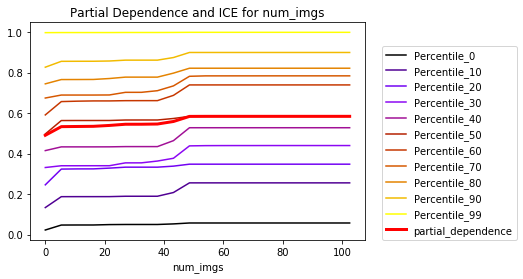

In [48]:
plot_par_dep_ICE('num_imgs', par_dep_num_imgs)

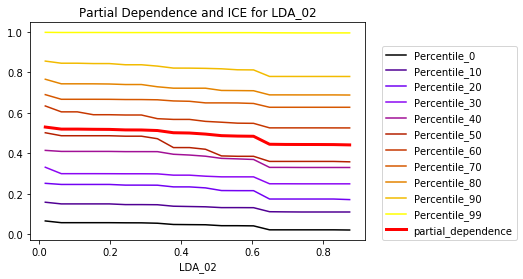

In [53]:
plot_par_dep_ICE('LDA_02', par_dep_LDA_02)

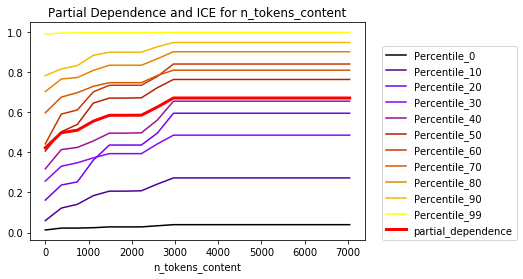

In [44]:
plot_par_dep_ICE('n_tokens_content', par_dep_n_tokens_content)